# Introduction

In this data mining project, the focus shifts towards predicting stock market movement rather than attempting to predict specific prices. Given the inherent volatility of the stock market, forecasting movement presents a challenging yet valuable opportunity. By accurately predicting whether the market will rise or fall within a certain timeframe, businesses and investors can make more informed decisions to mitigate risks and capitalize on opportunities.

# Problem

The main challenge of my project is to develop a model capable of predicting the movement of the stock market. This task will be difficult due to the complex and dynamic nature of financial markets.

# Target Model

My primary aim with this model is to predict whether the stock market will move upwards or downwards within a specific timeframe. I plan to achieve this by blending historical market data with sentiment analysis of news article headlines. This approach reflects my belief in combining quantitative analysis with qualitative insights to forecast market trends accurately.

# Data Sources

Data will be sourced from two primary channels: CNBC headlines for sentiment analysis and the Yahoo API for historical market data. The CNBC headlines will provide qualitative insights into market sentiment, while the Yahoo API will offer quantitative data on stock prices, volumes, and other relevant metrics.

# Milestone 1

In [58]:
# This imports the needed packages
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from textblob import TextBlob

In [59]:
stock_symbol = 'AAPL'  # This is the stock symbol
start_date = '2018-01-01' # This is the start date
end_date = '2020-01-01' # This is the end date

stock_data = yf.download(stock_symbol, start=start_date, end=end_date) # This uses the yahoo finance api to call the data
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797432,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200
...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.054352,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.424385,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.397675,146266000


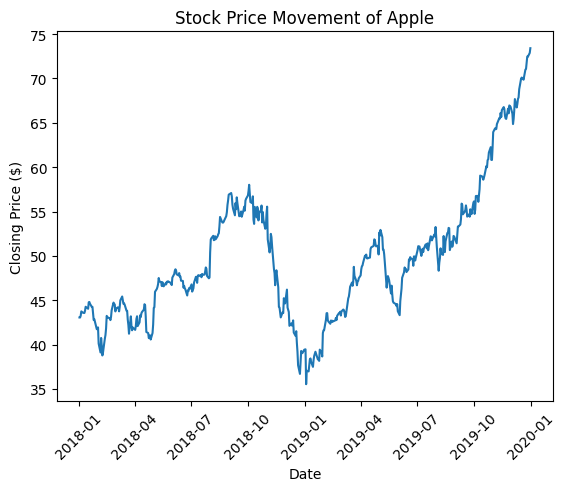

In [60]:
# Plot 1
sns.lineplot(data=stock_data['Close']) # This plots a line based on the close for each day
plt.title('Stock Price Movement of Apple') # This labels the title of the plot
plt.xlabel('Date') # This labels the x-axis of the plot
plt.ylabel('Closing Price ($)') # This labels the y-axis of the plot
plt.xticks(rotation=45) # This rotates the x-axis of the plot
plt.show() # This displays the plot

> This plot shows the historical stock price. This allows us to see how the stock price has moved and changed over time.

/var/folders/x7/qrnrw4rd6jlbxb3n07zps4vh0000gn/T/ipykernel_2450/1286243406.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = stock_data['Volume'].resample('M').sum()


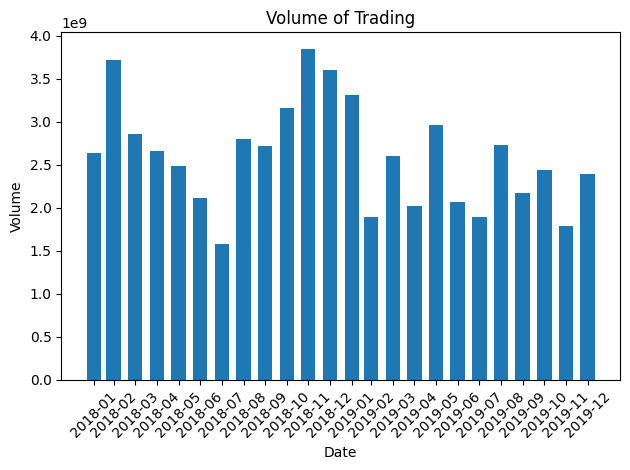

In [61]:
# Plot 2
monthly_data = stock_data['Volume'].resample('M').sum()
plt.bar(monthly_data.index, monthly_data.values, width=20)  # Width adjusted for better visualization
plt.title('Volume of Trading') # This labels the title of the plot
plt.xlabel('Date') # This labels the x-axis of the plot
plt.ylabel('Volume') # This labels the y-axis of the plot
plt.xticks(monthly_data.index, [date.strftime('%Y-%m') for date in monthly_data.index], rotation=45)  # This shows only years and months
plt.tight_layout()  # This adjusts layout to prevent clipping of labels
plt.show() # This displays the plot.

> This plot shows the volume of the traded stocks through each day. This tells us how often these stocks were being bought and sold. This gives a good insight into what the activity was like for the day.

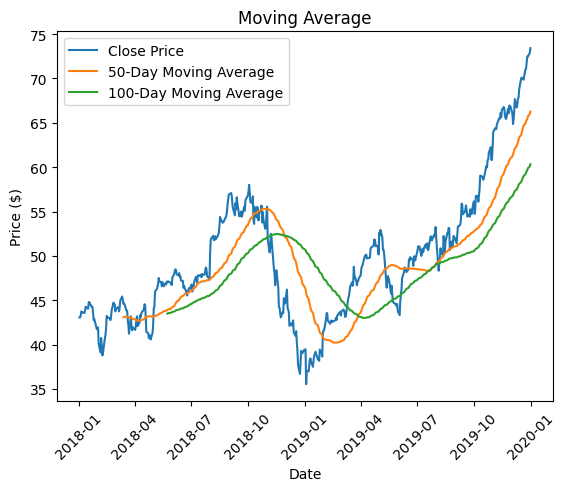

In [62]:
# Plot 3
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean() # This gets a 50 day moving average of the closing price
stock_data['MA_100'] = stock_data['Close'].rolling(window=100).mean() # This gets a 200 day moving average of the closing price
plt.plot(stock_data.index, stock_data['Close'], label='Close Price') # This plots the index against the closing price
plt.plot(stock_data.index, stock_data['MA_50'], label='50-Day Moving Average') # This plots the index against the 50 day moving average
plt.plot(stock_data.index, stock_data['MA_100'], label='100-Day Moving Average') # This plots the index against the 100 day moving average
plt.title('Moving Average') # This displays the title
plt.xlabel('Date') # This labels the x-axis
plt.ylabel('Price ($)') # This labels the y-axis
plt.legend() # This generates a legend
plt.xticks(rotation=45) # This rotates the x axis 45 degrees
plt.show() # This displays the plot

> The moving average chart allows me to see how the closing price has changed in relation to a moving window of time. The first window of time is 50. This allows for a smaller timeframe to be examined for a bit more volatility in the average. The second window of time is 100. This allows for a more generalized trend of the closing price data.

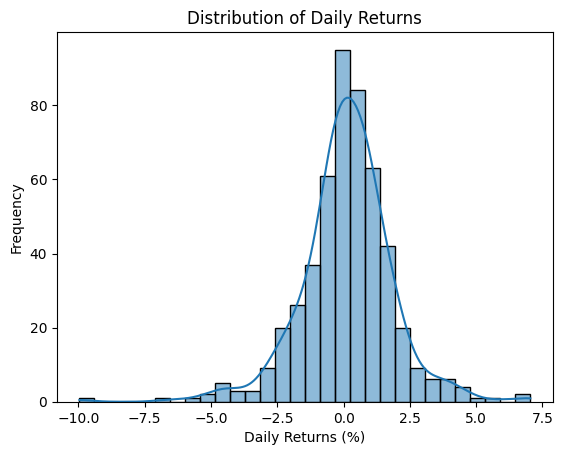

In [63]:
# Plot 4
stock_data['Daily_Return'] = stock_data['Close'].pct_change() * 100  # This gets the percentage change in the closing price
sns.histplot(data=stock_data['Daily_Return'].dropna(), bins=30, kde=True) # This gets the daily return of the data (dropping missing values)
plt.title('Distribution of Daily Returns') # This labels the title
plt.xlabel('Daily Returns (%)') # This labels the x-axis
plt.ylabel('Frequency') # This labels the y-axis
plt.show() # This displays the plot

> This chart allows me to see what the frequency of the returns are. One thing to keep in mind is that if there is a skew in the graph, it means that for that particular timeframe it might be a more bullish or bearish stock market.

# Milestone 2

In [64]:
cnbc_data = pd.read_csv('cnbc_headlines.csv') # This reads in the csv headlines from cnbc

In [65]:
def get_sentiment(text:str) -> float: # This defines the function with the parameter text
    analysis = TextBlob(str(text)) # This gets the textblob analysis for 
    return analysis.sentiment.polarity # This returns the textblob sentiment

1. Date Transformation

In [66]:
cnbc_data['Time'] = cnbc_data['Time'].str.strip() # This strips the whitespace from the time column
cnbc_data['Date'] = pd.to_datetime(cnbc_data['Time']).dt.strftime('%Y-%m-%d') # This gets the Time column to be in the format of yyyy-mm-dd
cnbc_data = cnbc_data.dropna(subset=['Time']).reset_index(drop=True) # This drops the nulls from the Date column
cnbc_data['desc_sentiment'] = cnbc_data['Description'].apply(get_sentiment) # This applies the function that I made to get the sentiment of a string and apply it to the entire column
cnbc_data['header_sentiment'] = cnbc_data['Headlines'].apply(get_sentiment) # This applies the function that I made to get the sentiment of a string and apply it to the entire column
cnbc_data.head() # This prints the head of the data


/var/folders/x7/qrnrw4rd6jlbxb3n07zps4vh0000gn/T/ipykernel_2450/2446807026.py:2: FutureWarning: Parsed string "7:51  PM ET Fri, 17 July 2020" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  cnbc_data['Date'] = pd.to_datetime(cnbc_data['Time']).dt.strftime('%Y-%m-%d') # This gets the Time column to be in the format of yyyy-mm-dd
/var/folders/x7/qrnrw4rd6jlbxb3n07zps4vh0000gn/T/ipykernel_2450/2446807026.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cnbc_data['Date'] = pd.to_datetime(cnbc_data['Time']).dt.strftime('%Y-%m-%d') # This gets the Time column to be in the format of yyyy-mm-dd
/var/folders/x7/qrnrw4rd6jlbxb3n07zps4vh0000gn/T/ipykernel_2450/2446807026.py:2

,Headlines,Time,Description,Date,desc_sentiment,header_sentiment
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying...",2020-07-17,-0.1875,0.5
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin...",2020-07-17,-0.4125,0.2
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co...",2020-07-17,0.6000,0.0
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be...",2020-07-17,0.0000,0.0
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies...",2020-07-16,-0.1875,0.6


> These date transformations are to get the date into the format yyyy-mm-dd to allow the data to be joined with the yahoo data for a particular stock. Keep in mind that the time column had nulls dropped due to it being a primary key. I cannot interpolate the time column because this will drastically skew the data.

In [67]:
average_sentiment_per_day = cnbc_data.groupby('Date')[['desc_sentiment', 'header_sentiment']].mean().reset_index() # This groups the average sentiment by the date
average_sentiment_per_day['Date'] = pd.to_datetime(average_sentiment_per_day['Date']) # This converts the date to a date object
average_sentiment_per_day.head() # This prints the head of the data

,Date,desc_sentiment,header_sentiment
0,2017-12-22,0.031481,-0.000463
1,2017-12-26,-0.250000,0.000000
2,2017-12-27,0.111111,0.136364
3,2018-01-02,0.196429,0.081151
4,2018-01-03,0.112753,0.031250


> This groups the data by the date to get the average sentiment for both the headers and the descriptions.

In [68]:
date_range = pd.date_range(start=start_date, end=end_date) # This sets up a date range object to get all of the dates
all_dates_df = pd.DataFrame({'Date': date_range}) # This converts all of the date into a data frame

merged_df = pd.merge(all_dates_df, average_sentiment_per_day, on='Date', how='left') # This merges on the time so that all missing dates are now present.
merged_df['desc_sentiment'] = merged_df['desc_sentiment'].interpolate(method='linear') # This should interpolate between values of sentiment.
merged_df['desc_sentiment'] = merged_df['desc_sentiment'].fillna(0) # This fills in the missing left over values with 0 for a neutral sentiment
merged_df.head()

,Date,desc_sentiment,header_sentiment
0,2018-01-01,0.000000,NaN
1,2018-01-02,0.196429,0.081151
2,2018-01-03,0.112753,0.031250
3,2018-01-04,-0.030519,0.050000
4,2018-01-05,-0.155382,-0.191667


> This gets all of the missing dates and merges it with our grouped data. This is done so that the sentiment can be interpolated correctly in between sentiments. The headlines, time, and description columns have all been dropped due to consolidation into the date column and no longer a need for the strings once the sentiment was calculated.

In [69]:
merged_df['header_sentiment'] = merged_df['header_sentiment'].interpolate(method='linear') # This should interpolate between values of sentiment.
merged_df['header_sentiment'] = merged_df['header_sentiment'].fillna(0) # This fills in the missing left over values with 0 for a neutral sentiment
merged_df.head() # This prints the head of the data

,Date,desc_sentiment,header_sentiment
0,2018-01-01,0.000000,0.000000
1,2018-01-02,0.196429,0.081151
2,2018-01-03,0.112753,0.031250
3,2018-01-04,-0.030519,0.050000
4,2018-01-05,-0.155382,-0.191667


> This is process is repeated for the header sentiment. I am using both the description and header sentiments to ensure that there is a somewhat consistent sentiment between the two strings.

In [70]:
stock_data = stock_data.reset_index() # This resets the index to make the date its own column
stock_data = stock_data.dropna(subset=['Date']) # This removes the date nulls as it is the primary key
stock_data = stock_data.interpolate(method='linear') # This interpolates the missing values.

stock_data.head() # This prints the head of the data

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_100,Daily_Return
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600,NaN,NaN,NaN
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600,NaN,NaN,-0.017415
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797432,89738400,NaN,NaN,0.464497
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000,NaN,NaN,1.138532
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200,NaN,NaN,-0.371425


In [71]:
merged_data = pd.merge(stock_data, average_sentiment_per_day, on='Date', how='inner') # This merges the stock data to the average sentiment calculated

merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_100,Daily_Return,desc_sentiment,header_sentiment
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600,NaN,NaN,NaN,0.196429,0.081151
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600,NaN,NaN,-0.017415,0.112753,0.031250
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797432,89738400,NaN,NaN,0.464497,-0.030519,0.050000
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000,NaN,NaN,1.138532,-0.155382,-0.191667
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200,NaN,NaN,-0.371425,0.150694,0.191667
...,...,...,...,...,...,...,...,...,...,...,...,...
452,2019-12-23,70.132500,71.062500,70.092499,71.000000,68.988770,98572000,64.91860,59.201075,1.631834,-0.181250,0.175000
453,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.424385,93121200,65.43355,59.643125,1.984034,0.007183,-0.300000
454,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.397675,146266000,65.71070,59.875125,-0.037948,0.377778,0.125000
455,2019-12-30,72.364998,73.172501,71.305000,72.879997,70.815498,144114400,65.99190,60.106325,0.593513,0.016528,0.000000


> I only want the dates, sentiments, and closing for my time series model because I am attempting to complete a more simplistic model that has less features to reduce complexity.

# Milestone 3

In [72]:
merged_data['Movement'] = merged_data['Close'] - merged_data['Open'] # This gets the movement of the data
merged_data['Movement'] = (merged_data['Movement'] > 0).astype(int) # This makes the movement of the data binary.
final_data = merged_data.dropna() # This drops any null values in the data.

final_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_100,Daily_Return,desc_sentiment,header_sentiment,Movement
93,2018-05-24,47.192501,47.209999,46.552502,47.037498,44.715099,92936000,43.92560,43.502875,-0.111492,0.150000,0.162500,0
94,2018-05-29,46.900002,47.187500,46.717499,46.974998,44.655693,90056400,44.02465,43.582850,-0.360594,0.121162,0.037273,1
95,2018-05-30,46.930000,47.000000,46.695000,46.875000,44.560619,74762000,44.08565,43.619025,-0.212876,-0.338426,0.166667,0
96,2018-05-31,46.805000,47.057499,46.535000,46.717499,44.410904,109931200,44.14380,43.648700,-0.336003,0.147817,-0.100000,0
97,2018-06-01,46.997501,47.564999,46.937500,47.560001,45.211807,93770000,44.23865,43.688425,1.803398,0.273333,0.185000,1


#### Models

1. Random Forest Classifier

> Random Forest is a useful learning method known for its robustness and ability to handle complex data with high dimensionality. I chose it because it is suitable for both classification and regression tasks. It is a good candidate for predicting stock market movements based on features like closing price and sentiment.

In [73]:
# This imports the sklearn libraries for model selection.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [74]:
X = final_data[['Close', 'header_sentiment']] # This takes the header_sentiment and the close as the features.
y = final_data['Movement']  # This sets the movement as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # This splits the data into training and test sets for model evaluation

In [75]:
model = RandomForestClassifier(n_estimators=50, min_samples_leaf=4,random_state=42) # This initializes the Random Forest classifier model. 
model.fit(X_train, y_train) # This fits the data to the model
predictions = model.predict(X_test) # This predicts the test data.

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# This prints evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Accuracy:", accuracy) # This prints the accuracy score of the model

Evaluation Metrics:
Accuracy: 0.6301369863013698
Precision: 0.7560975609756098
Recall: 0.6458333333333334
F1 Score: 0.6966292134831461
ROC AUC Score: 0.6229166666666667
Accuracy: 0.6301369863013698


> The random forest classifier yielded an accuracy of 63.01%, with precision, recall, F1-score, and ROC AUC score of 75.61%, 64.58%, 69.66%, and 62.29% respectively. While an accuracy of 63.01% may not be very high, it serves as a starting point for further exploration and improvement. By incorporating additional features and experimenting with different models, I can start to develop a more accurate prediction system for stock market movements. This also presents an opportunity to explore better hyperparameters for tuning.

In [76]:
# This defines the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) # This creates the grid search with the random forest model

grid_search.fit(X_train, y_train) # This fits the grid search with the training data.

best_params = grid_search.best_params_ # This gets the best parameters of the grid search.
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_ # This gets the best model

predictions = best_model.predict(X_test) # This makes predictions using the best model

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# This prints evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Accuracy:", accuracy) # This prints the accuracy score of the model


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Evaluation Metrics:
Accuracy: 0.5342465753424658
Precision: 0.6842105263157895
Recall: 0.5416666666666666
F1 Score: 0.6046511627906976
ROC AUC Score: 0.5308333333333333
Accuracy: 0.5342465753424658


> The grid search for hyperparameter tuning did not give better results compared to the initial model. The accuracy of the best model obtained from the grid search was only 53.42%, significantly lower than the 61% accuracy achieved by the initial model. Additionally, the precision, recall, F1 score, and ROC AUC score of the best model were found to be 75.61%, 64.58%, 69.66%, and 62.29% respectively. This indicates that the hyperparameters explored during the grid search might not have been effective in improving the model's performance across various metrics. The grid search process did not lead to an enhancement but rather resulted in a technically worse model, as seen from the lower accuracy and other evaluation metrics.

# Conclusion

> In conclusion, this data mining project aimed to develop a predictive model for stock market movements by blending historical market data with sentiment analysis of news article headlines. Throughout the project, various milestones were achieved, from data collection and preprocessing to model development and evaluation. Initially, exploratory data analysis provided insights into stock market behavior, while sentiment analysis of CNBC headlines offered qualitative insights into market sentiment. The combination of these datasets enabled the training of a Random Forest Classifier, which exhibited a moderate accuracy rate of 63.01% in predicting market movements. However, attempts to optimize the model through hyperparameter tuning did not yield significant improvements, underscoring the complexity of predicting stock market behavior. Future directions for this project may involve further exploration of feature engineering techniques and alternative modeling approaches to enhance predictive accuracy. Despite the challenges, this project contributes to the understanding of financial market forecasting and lays the groundwork for future advancements in the field.

> Looking back, I see some areas where I would tweak things for future runs. I would dive deeper into feature engineering, pulling in more data like technical indicators and economic stats to get a fuller picture of market dynamics. Plus, I would take a more methodical approach to picking models and fine-tuning their settings, while keeping an eye on different evaluation metrics to gauge performance better. Considering ensemble techniques could add some extra depth to my predictions too. And, of course, I'd want to make sure my models hold up outside of the training data by beefing up my validation methods. With these changes, I'm aiming for more accurate and dependable predictions on stock market movements down the line.